# Analysis of Ontario's Unemployment Duration

Dataset Title: Duration of unemployment

Dataset Source: Ontario Data Catalogue

Dataset URL: https://data.ontario.ca/dataset/duration-of-unemployment/resource/8f786bb5-01ac-4e7d-b89f-3437a601941b

Data Accessed: October 19, 2023

In [1]:
# Importing py libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset into a py dataframe

df = pd.read_csv('mltsd_v0906_18_tab2qq.csv')

In [3]:
# Exploratory Data Analysis

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

     MONTH               GEOGRAPHY          DURATION  \
0  Mar2001  Total, Ontario regions  Total unemployed   
1  Mar2001  Total, Ontario regions  Total unemployed   
2  Mar2001  Total, Ontario regions  Total unemployed   
3  Mar2001  Total, Ontario regions  Total unemployed   
4  Mar2001  Total, Ontario regions  Total unemployed   

                  AGE GROUP  Both sexes   Male  Female  
0  Total, 15 years and over       398.0  229.0   169.0  
1               15-64 years       395.8  228.0   167.9  
2                     15-19        67.5   39.3    28.1  
3                     20-24        53.9   36.2    17.7  
4                     25-44       184.4  101.7    82.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37920 entries, 0 to 37919
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MONTH       37920 non-null  object 
 1   GEOGRAPHY   37920 non-null  object 
 2   DURATION    37920 non-null  object 
 3   AGE

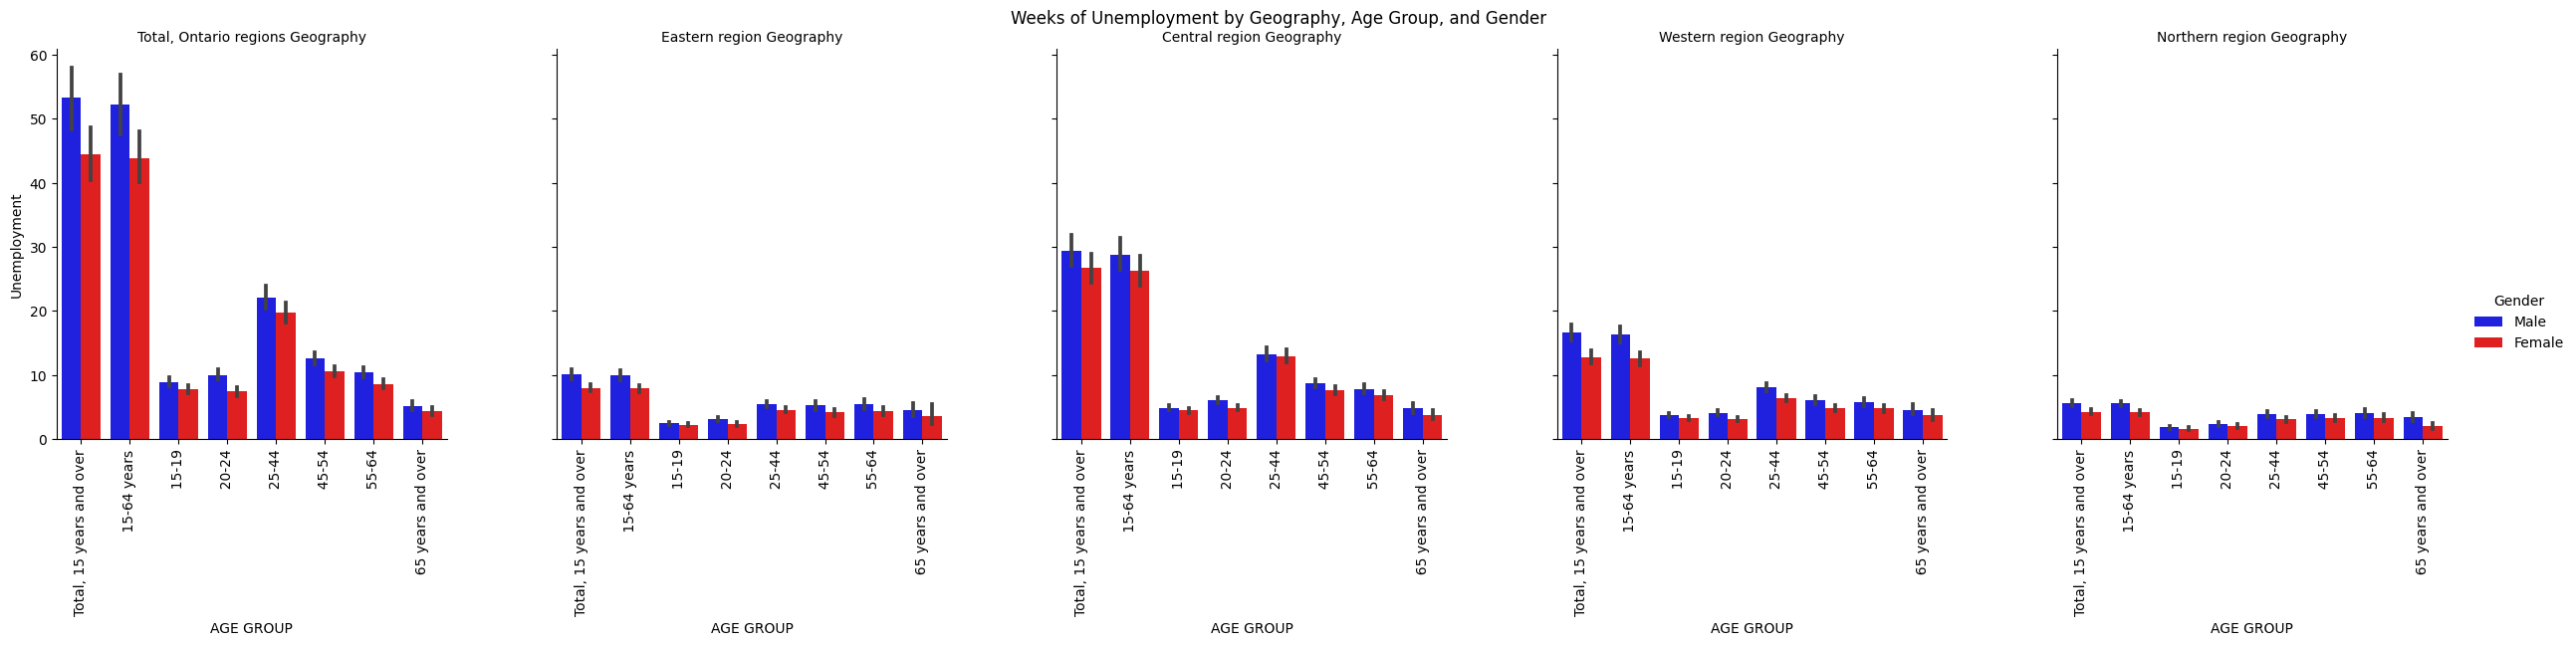

In [4]:
# Plotting Unemployment Numbers by Age Group for both Males and Females

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Melt dataframe to have a 'Gender' column
df_melted = pd.melt(df, id_vars=['MONTH', 'GEOGRAPHY', 'DURATION', 'AGE GROUP'], 
                    value_vars=['Male', 'Female'], 
                    var_name='Gender', value_name='Unemployment')

# Using catplot to visualize
g = sns.catplot(data=df_melted, x='AGE GROUP', y='Unemployment', hue='Gender', col='GEOGRAPHY', kind='bar', height=5, aspect=1, palette=['blue', 'red'])
g.set_titles("{col_name} Geography")
g.set_xticklabels(rotation=90)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Weeks of Unemployment by Geography, Age Group, and Gender')
plt.show()

In [5]:
# Transforming the Month feature into a date format as prep for a time series analysis

# Convert "MONTH" from string to datetime
df['MONTH'] = pd.to_datetime(df['MONTH'], format='%b%Y')

# Display the first few rows to verify the change
print(df.head())

       MONTH               GEOGRAPHY          DURATION  \
0 2001-03-01  Total, Ontario regions  Total unemployed   
1 2001-03-01  Total, Ontario regions  Total unemployed   
2 2001-03-01  Total, Ontario regions  Total unemployed   
3 2001-03-01  Total, Ontario regions  Total unemployed   
4 2001-03-01  Total, Ontario regions  Total unemployed   

                  AGE GROUP  Both sexes   Male  Female  
0  Total, 15 years and over       398.0  229.0   169.0  
1               15-64 years       395.8  228.0   167.9  
2                     15-19        67.5   39.3    28.1  
3                     20-24        53.9   36.2    17.7  
4                     25-44       184.4  101.7    82.7  


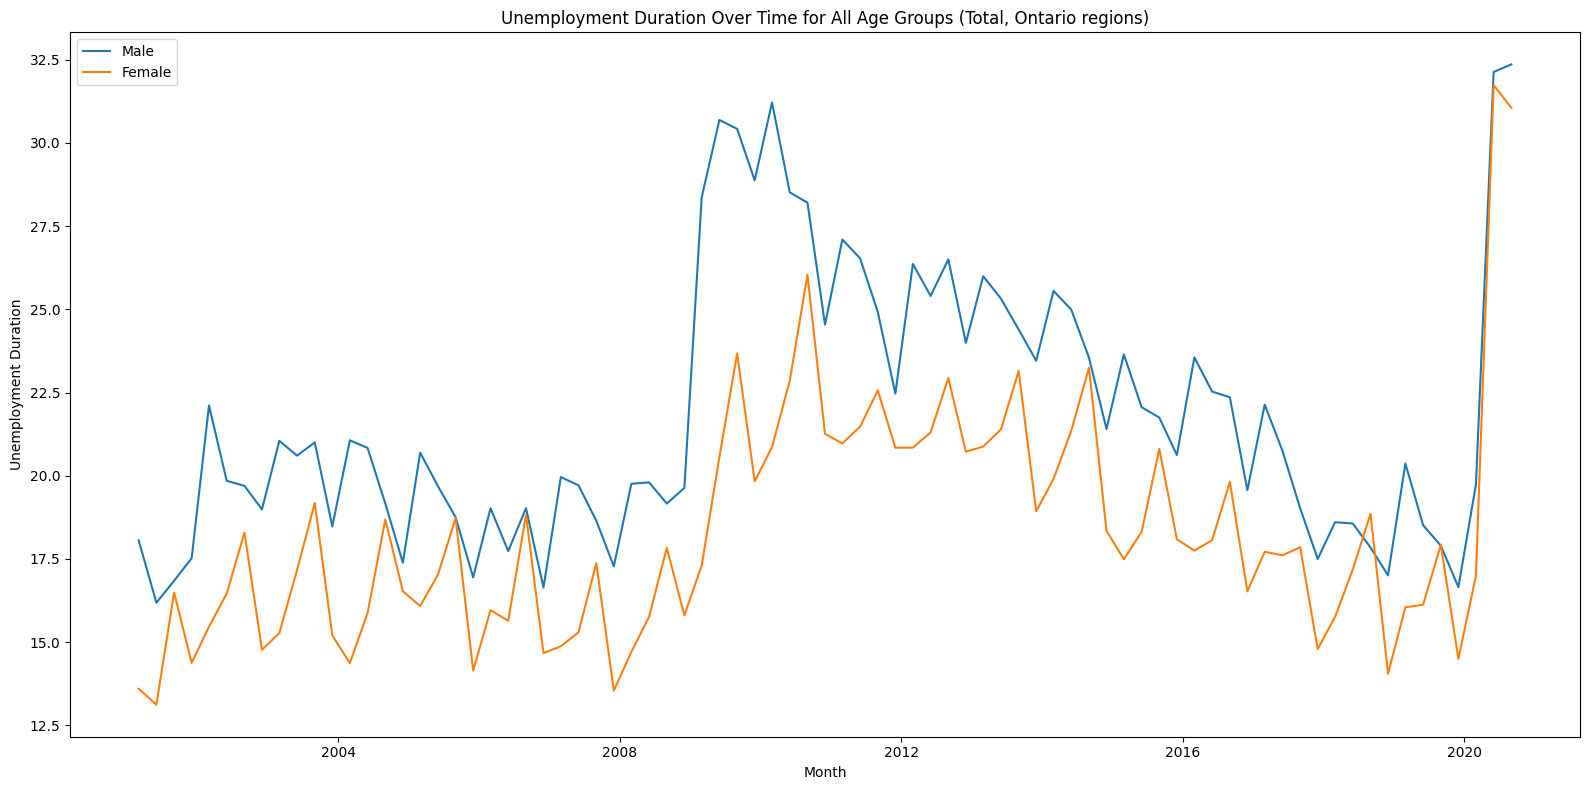

In [6]:
# Plotting Duration of Unemployment for all Age Groups over time

# Filtering data
filtered_df = df[df['GEOGRAPHY'] == 'Total, Ontario regions']

# Setting the figure size
plt.figure(figsize=(16, 8))

# Creating a lineplot for Male and Female
sns.lineplot(data=filtered_df, x='MONTH', y='Male', label='Male', ci=None)
sns.lineplot(data=filtered_df, x='MONTH', y='Female', label='Female', ci=None)

# Setting the title and labels
plt.title('Unemployment Duration Over Time for All Age Groups (Total, Ontario regions)')
plt.xlabel('Month')
plt.ylabel('Unemployment Duration')
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

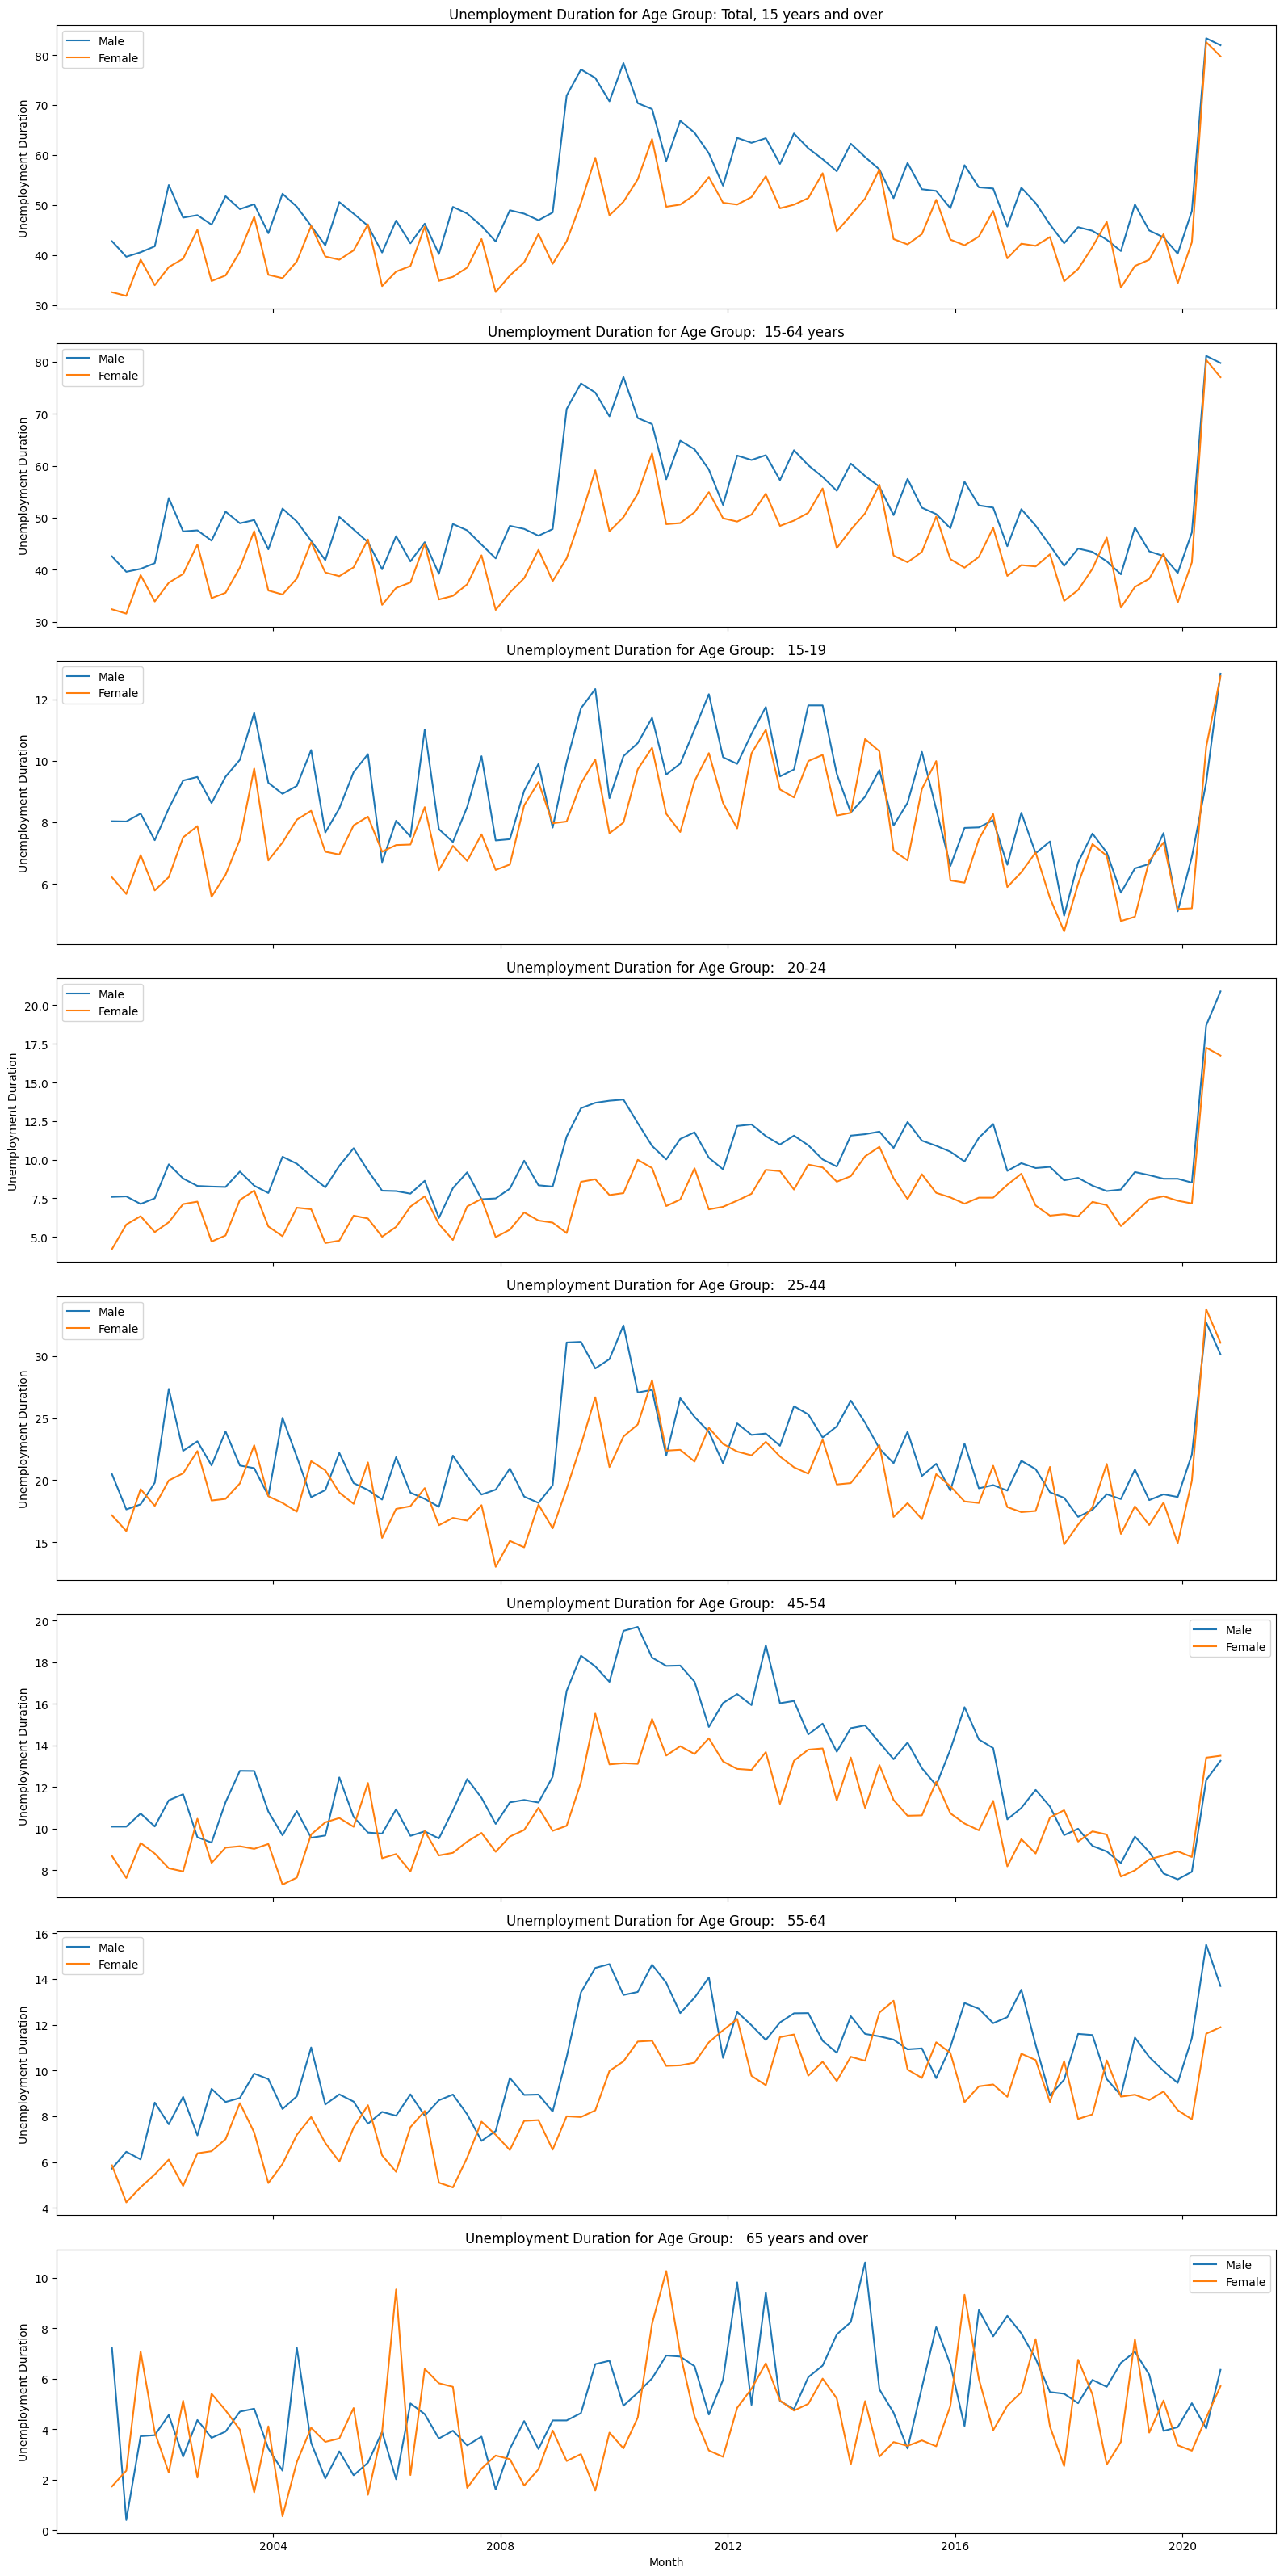

In [7]:
# Visualizing Duration of Unemployment for each Age Group in Ontario

# Filtering data for 'Total, Ontario regions'
filtered_df = df[df['GEOGRAPHY'] == 'Total, Ontario regions']

# Unique age groups
age_groups = filtered_df['AGE GROUP'].unique()

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(age_groups), figsize=(16, 4 * len(age_groups)), sharex=True)

for idx, age_group in enumerate(age_groups):
    age_data = filtered_df[filtered_df['AGE GROUP'] == age_group]
    sns.lineplot(data=age_data, x='MONTH', y='Male', ax=axes[idx], label='Male', ci=None)
    sns.lineplot(data=age_data, x='MONTH', y='Female', ax=axes[idx], label='Female', ci=None)
    axes[idx].set_title(f'Unemployment Duration for Age Group: {age_group}')
    axes[idx].set_ylabel('Unemployment Duration')
    axes[idx].legend()

# Setting a common x label for all subplots
plt.xlabel('Month')
plt.tight_layout()
plt.show()